In [1]:
import math 
import numpy as np
import scipy
from matplotlib import pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import levy_stable, gaussian_kde
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## TASK 1

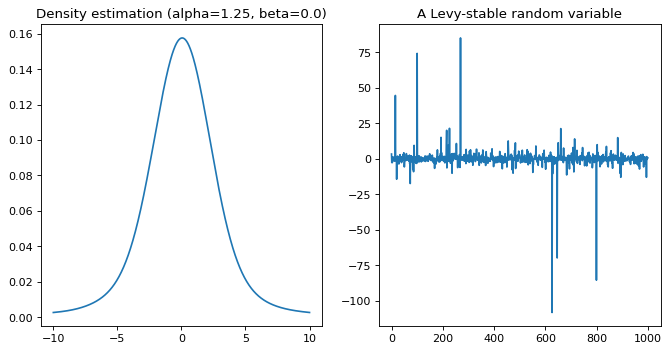

<function __main__.Stable(k, delta=0, gamma=1)>

In [2]:
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']= 80

def Stable(k, delta=0, gamma=1):
    if k==0:
        def first_par(a,b):
            x = np.linspace(-10,10,1000)
            R = levy_stable.rvs(a, b, loc=delta, scale=gamma, size = 1000)
            kde = gaussian_kde(R)
            y = kde(x)
            fig, (ax1, ax2) = plt.subplots(1, 2)
            ax1.plot(x,y)
            ax1.set_title('Density estimation (alpha={0}, beta={1})'.format(a, b))
            ax2.plot(R)
            ax2.set_title('A Levy-stable random variable')
        interact(first_par,a=(0.5,2,0.25), b=(-1,1,0.25))
    else:
        def second_par(a,b):
            x = np.linspace(-10,10,1000)
            R = levy_stable.rvs(a, b, loc=delta, scale=gamma, size = 1000)
            pconv = lambda alpha, beta, mu, sigma: (alpha, beta, mu - sigma * beta * np.tan(np.pi * alpha / 2.0), sigma)
            kde = gaussian_kde(pconv(*levy_stable._fitstart(R)))
            y = kde(x)
            fig, (ax1, ax2) = plt.subplots(1, 2)
            ax1.plot(x,y)
            ax1.set_title('Density estimation (alpha={0}, beta={1})'.format(a, b))
            ax2.plot(R)
            ax2.set_title('A Levy-stable random variable')
        interact(second_par,a=(0.5,2,0.25), b=(-1,1,0.25))
        
        
interact(Stable, k=(0,1), delta=fixed(0), gamma=fixed(1))

## TASK 2

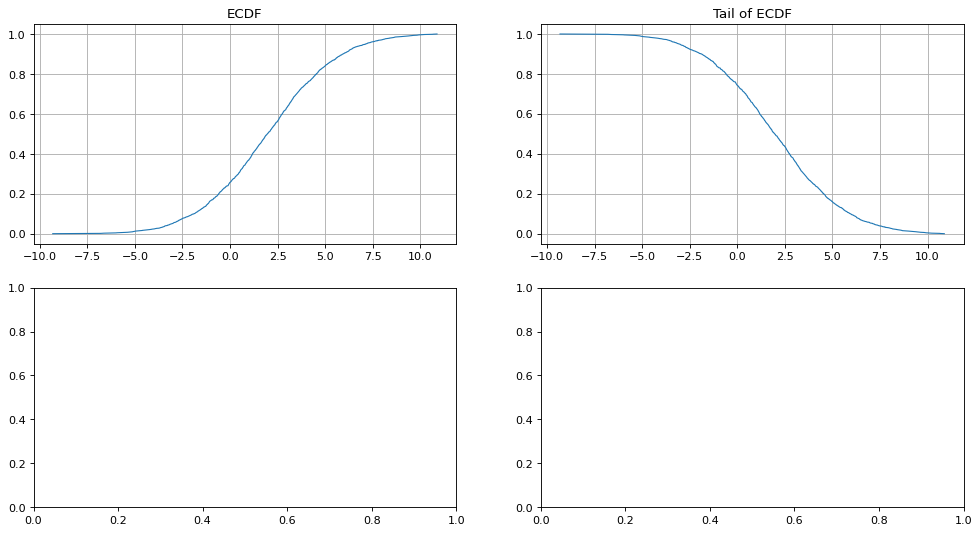

In [3]:
def task_2(sample):
    ecdf = ECDF(sample)
    
    fig, axs = plt.subplots(2, 2, figsize=(15,8))
    
    # ECDF
    axs[0,0].plot(ecdf.x, ecdf.y, linewidth=1)
    axs[0,0].set_title('ECDF')
    axs[0,0].grid()
    
    # Tail of ECDF
    axs[0,1].plot(ecdf.x, [1-i for i in ecdf.y], linewidth=1)
    axs[0,1].set_title('Tail of ECDF')
    axs[0,1].grid()
    
    # Comparison of ECDF with given function
    
    # Comparison of ECDF Tail with given function
    
    
    plt.show()
    return

sample = np.random.normal(2, 3, 2000)
task_2(sample)

## TASK 3

/home/iza/.local/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


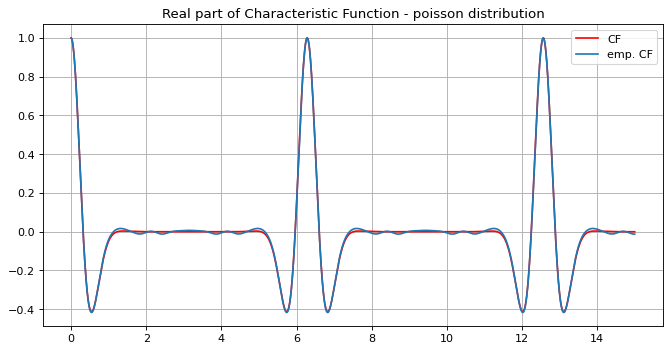

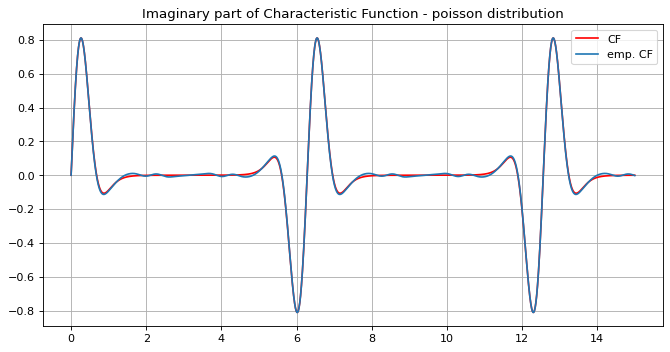

In [4]:

def compare_CF(sample, distr, *args):
    # This function compares theoretical and empirical characteristic function of sample.
    # First argument is the sample, second argument is a string containing distribution name:
    # (normal, exponential, uniform, poisson).
    # The other arguments are all necessary parameters of specific distribution
    
    N = len(sample)
    x = np.linspace(min(sample), max(sample), N)

    if distr == 'normal':
        mu = args[0]
        sigma = args[1]
        
        cf = np.exp(1j*x*mu - 0.5*(sigma**2)*(x**2))
        emp_cf = np.empty(N, dtype='complex')
        arr_sample = np.asarray(sample)
        for i in range(N):
            emp_cf[i] = sum(np.exp(1j*x[i]*arr_sample))/N
     
    elif distr == 'exponential':
        lmbd = args[0]
        
        cf = (1 - 1j*x*lmbd**(-1))**(-1)
        emp_cf = np.empty(N, dtype='complex')
        arr_sample = np.asarray(sample)
        for i in range(N):
            emp_cf[i] = sum(np.exp(1j*x[i]*arr_sample))/N
    
    elif distr == 'uniform':
        a = args[0]
        b = args[1]
        
        cf = (np.exp(1j*x*b) - np.exp(1j*x*a))/(1j*x*(b - a))
        emp_cf = np.empty(N, dtype='complex')
        arr_sample = np.asarray(sample)
        for i in range(N):
            emp_cf[i] = sum(np.exp(1j*x[i]*arr_sample))/N
         
    elif distr == 'poisson':
        lmbd = args[0]
        
        cf = np.exp(lmbd*(np.exp(1j*x) - 1))
        emp_cf = np.empty(N, dtype='complex')
        arr_sample = np.asarray(sample)
        for i in range(N):
            emp_cf[i] = sum(np.exp(1j*x[i]*arr_sample))/N
       
    else:
        return('incorrect distribution')
    
    # Real part of CF
    plt.figure(figsize=(10,5)) 
    plt.plot(x, cf, color='red', label='CF')
    plt.plot(x, emp_cf.real, label='emp. CF')
    plt.title('Real part of Characteristic Function - {name} distribution'.format(name = distr))
    plt.legend()
    plt.grid()
    plt.show()

    # Complex part of CF
    plt.figure(figsize=(10,5))     
    plt.plot(x, cf.imag, color='red', label='CF')
    plt.plot(x, emp_cf.imag, label='emp. CF')
    plt.legend()
    plt.grid()
    plt.title('Imaginary part of Characteristic Function - {name} distribution'.format(name = distr))
    plt.show()
    
    return

#######################################################################################

#sample = np.random.normal(2, 3, 5000)
#compare_CF(sample, 'normal', 2, 3)

#sample = np.random.exponential(1/2, 1000)
#compare_CF(sample, 'exponential', 2)

#sample = np.random.uniform(1, 6, 1000)
#compare_CF(sample, 'uniform', 1, 6)

sample = np.random.poisson(5, 5000)
compare_CF(sample, 'poisson', 5)

## TASK 4

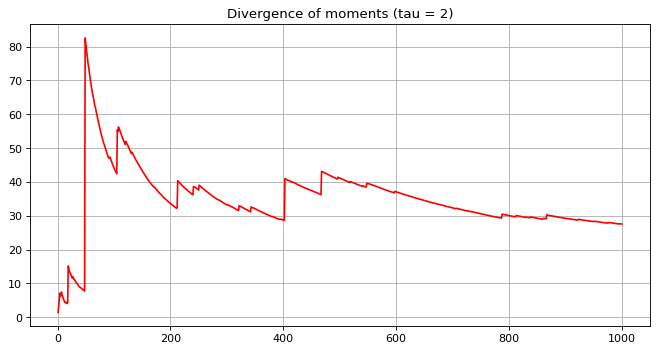

In [5]:
def Divergence_of_moments(sample, moment = 2):
    
    N = range(1,len(sample)+1)
    y = []
    
    for n in N:
        y.append((1/n)*np.sum(np.power(sample[0:n], moment)))
        
    plt.figure(figsize=(10,5)) 
    plt.plot(N, y, color='red', label=' ')
    plt.title('Divergence of moments (tau = {mom})'.format(mom = moment))
    plt.grid()
    plt.show()
    return

(a, b, delta, gamma) = (1.25, 0.5, 0, 1)
sample = levy_stable.rvs(a, b, loc=delta, scale=gamma, size = 1000)

Divergence_of_moments(sample)

## TASK 5

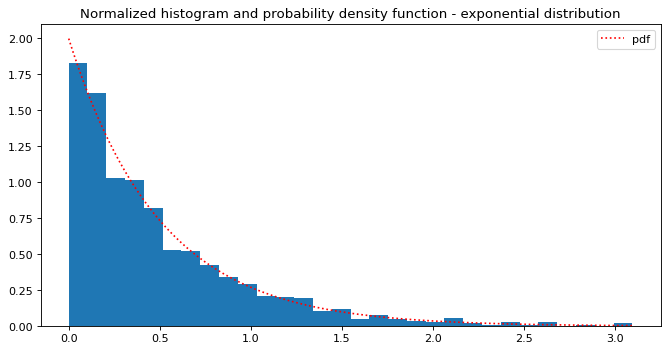

In [6]:
def compare_PDF(sample, distr, *args):
    # This function compares theoretical PDF and normalized histogram of sample.
    # First argument is the sample, second argument is a string containing distribution name:
    # (normal, exponential, uniform).
    # The other arguments are all necessary parameters of specific distribution
    
    N = len(sample)
    x = np.linspace(min(sample), max(sample), N)

    if distr == 'normal':
        mu = args[0]
        sigma = args[1]
        
        pdf = (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-0.5*((x - mu)/sigma)**2)
     
    elif distr == 'exponential':
        lmbd = args[0]
        
        pdf = lmbd*np.exp(-lmbd*x)
    
    elif distr == 'uniform':
        a = args[0]
        b = args[1]
        
        pdf = [1/(b - a)]*N
         
    else:
        return('incorrect distribution')
    
    # Plot
    plt.figure(figsize=(10,5)) 
    plt.plot(x, pdf, color='red', linestyle=':', label='pdf')
    plt.hist(sample, bins=30, density=True)
    plt.title('Normalized histogram and probability density function - {name} distribution'.format(name = distr))
    plt.legend()
    plt.show()
    
    return

#############################################################################################################

#sample = np.random.normal(2, 3, 5000)
#compare_PDF(sample, 'normal', 2, 3)

sample = np.random.exponential(1/2, 1000)
compare_PDF(sample, 'exponential', 2)

#sample = np.random.uniform(1, 6, 1000)
#compare_PDF(sample, 'uniform', 1, 6)


In [7]:
x = [1,2,3]
print([1-i for i in x])

[0, -1, -2]
